In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from PIL import Image
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input 
)

In [4]:
flowers_directory=Path('flowers')

In [5]:
flowers_directory

WindowsPath('flowers')

In [6]:
list(flowers_directory.glob('*'))

[WindowsPath('flowers/daisy'),
 WindowsPath('flowers/dandelion'),
 WindowsPath('flowers/rose'),
 WindowsPath('flowers/sunflower'),
 WindowsPath('flowers/tulip')]

In [7]:
len(list(flowers_directory.glob('rose/*')))

784

In [8]:
flower_img_dict={
                 'daisy':list(flowers_directory.glob('daisy/*')),
                 'dandelion':list(flowers_directory.glob('dandelion/*')),
                 'rose':list(flowers_directory.glob('rose/*')),
                 'sunflower':list(flowers_directory.glob('sunflower/*')),
                 'tulip':list(flowers_directory.glob('tulip/*'))
}

In [9]:
flower_img_labels={
                 'daisy':0,
                 'dandelion':1,
                 'rose':2,
                 'sunflower':3,
                 'tulip':4  
}
                    

flower_name refers to the key of the dictionary, which represents the name of the flower (like 'daisy', 'dandelion', etc.).

image refers to the value associated with that key, which is a list of image paths for that particular flower.

In [10]:
x=[]
y=[]
accepted_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
for flower_name,image in flower_img_dict.items():
    print(flower_name)
    print(len(image))
    for img in image:
        # Skip non-image files (e.g., folders or checkpoint files)
        if '.ipynb_checkpoints' in str(img):
            continue
        if not img.suffix.lower() in accepted_extensions:
            continue  # Skip this file and move to the next one
        flower_img=cv2.imread(str(img))
        # Check if the image was loaded successfully
        if flower_img is None:
            continue  # Skip this image and continue to the next one
        resize_img=cv2.resize(flower_img,(224,224))
        x.append(resize_img)
        y.append(flower_img_labels[flower_name])      


daisy
765
dandelion
1052
rose
784
sunflower
733
tulip
984


In [11]:
classes=['daisy','dandelion','rose','sunflower','tulip'] 

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
def plot_img(x,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow((x[index]/255.0))
    plt.xlabel(classes[y[index]])

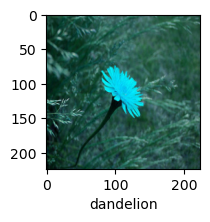

In [24]:
plot_img(x_train,y_train,20)

In [15]:
x_train = np.array(x_train, dtype='float')
x_test = np.array(x_test, dtype='float')

In [16]:
train_generator = datagen.flow(x_train, y_train, batch_size=32, shuffle=True, seed=42)
test_generator = datagen.flow(x_test, y_test, batch_size=32, shuffle=False, seed=42)

In [17]:
# Load MobileNetV2 without the top classification layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Unfreeze the last few layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-10]:  # Unfreeze the last 10 layers
    layer.trainable = False


# Build the model
model = Sequential([
    base_model,
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')  # Adjust number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
#7. Train the Model Using the Data Generators:

#Train the model using your training and testing data generators:​

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    steps_per_epoch=len(x_train) // 32,
    validation_steps=len(x_test) // 32
)

C:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.5934 - loss: 4.9972 - val_accuracy: 0.2188 - val_loss: 114.1360
Epoch 2/10
  1/107 ━━━━━━━━━━━━━━━━━━━━ 1:43 978ms/step - accuracy: 0.6562 - loss: 0.9668

C:\Anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


107/107 ━━━━━━━━━━━━━━━━━━━━ 28s 255ms/step - accuracy: 0.6562 - loss: 0.9668 - val_accuracy: 0.2188 - val_loss: 113.9399
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7825 - loss: 0.6359 - val_accuracy: 0.2188 - val_loss: 70.4837
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 25s 229ms/step - accuracy: 0.9062 - loss: 0.5444 - val_accuracy: 0.2188 - val_loss: 70.8847
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8132 - loss: 0.5551 - val_accuracy: 0.2674 - val_loss: 23.5867
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 26s 233ms/step - accuracy: 0.9062 - loss: 0.4836 - val_accuracy: 0.2708 - val_loss: 23.4378
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8398 - loss: 0.4265 - val_accuracy: 0.4387 - val_loss: 10.4555
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 24s 220ms/step - accuracy: 0.8750 - loss: 0.2464 - val_accuracy: 0.4444 - val_loss: 10.1691
Epoch 9/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8525 - loss: 0.4102 - val

In [19]:
pred=model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 702ms/step


In [20]:
y_pred_classes=np.argmax(pred,axis=1)

In [21]:
def plot_img(x,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index].astype('uint8'))
    plt.xlabel(classes[y[index]])
    plt.show()

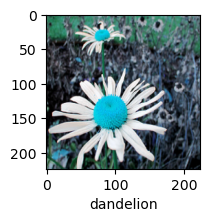

In [22]:
plot_img(x_test,y_pred_classes,20)

In [23]:
y_pred_classes[20]

1